In [1]:
import pandas as pd
import numpy as np
from main import import_data

data = import_data()

In [2]:
from main import count_unique

def build_regex_data(df):
    regex = df[["SUCCESS", "REGEX"]]

    # number of correct classifications
    true = count_unique(regex[regex["SUCCESS"] == True], "REGEX").rename("TRUE")

    # number of false classifications
    false = count_unique(regex[regex["SUCCESS"] == False], "REGEX").rename("FALSE")[true.keys()]
    
    # ensure, that both series have the same keys (todo also for true?)
    false = false.fillna(0)

    # total number of classifications
    count = (true + false).rename("N")

    # % of total correct classifications
    succ_ratio = (true / count).rename("SUCCESS%")

    regex_table = pd.concat([count, true, false, succ_ratio], axis=1).sort_values(by=["SUCCESS%"], ascending=[False])
    #regex_table = regex_table.set_index(pd.Series(np.arange(len(list(regex_table.index)))))

    # List of all regular expressions in the table
    exprs = pd.Series(list(regex_table.index)).rename("REGEX")
    regex_table = regex_table.set_index(pd.Series(np.arange(len(list(exprs.index)))))
    regex_table = pd.concat([exprs, regex_table], axis=1)
    
    # calculate simple length of all regular es
    calc_length = np.vectorize(len)
    lengths = pd.Series(calc_length(regex_table["REGEX"])).rename("LENGTH")
    regex_table = pd.concat([regex_table, lengths], axis=1)
    
    return regex_table

In [3]:
from regex_data import regex_stats
regex_stats()

REGEX  sum  succ  fail  succ_ratio
0      (a*|b)ab*ba  303   234    69    0.772277
1            (ab)*  196   157    39    0.801020
2          (a|ab)*   68    56    12    0.823529
3   (a|b)*ab(a|b)*  914   759   155    0.830416
4   (c|d)*cd(c|d)*   60    50    10    0.833333
5   (a|d)*ad(a|d)*   55    46     9    0.836364
6          (d|dc)*   72    61    11    0.847222
7   (b|c)*bc(b|c)*   49    42     7    0.857143
8            (ad)*  180   156    24    0.866667
9            (cd)*  220   202    18    0.918182
10         (b|ba)*   74    68     6    0.918919
11           a*|bb  184   174    10    0.945652
12         (c|cd)*   60    57     3    0.950000
13              d*   27    26     1    0.962963
14           (bc)*  172   167     5    0.970930
15             c|d   37    36     1    0.972973
16             d|a   41    40     1    0.975610
17             a|b  167   163     4    0.976048
18              a*   30    30     0    1.000000
19              b*   15    15     0    1.000000
20             b|c   30    30     0    1.000000
21              c*   10    10     0    1.000000

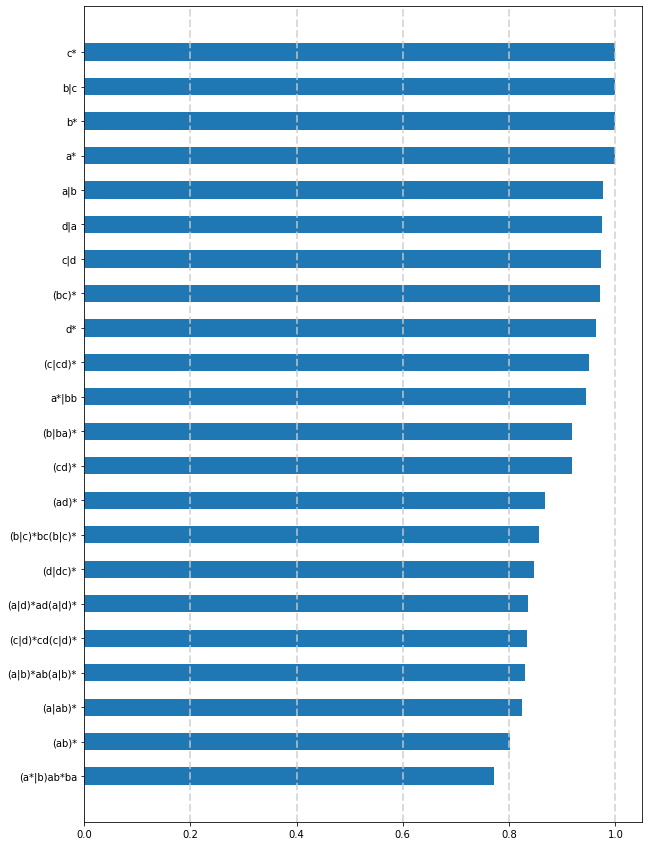

In [4]:
from matplotlib import pyplot as plt

regex_table = regex_stats()

plt.figure(figsize = (10, 15))
plt.grid(color='#cccccc', linestyle='--', linewidth=2, axis='x', alpha=0.7, zorder=0)
plt.barh(regex_table["REGEX"], width=regex_table["succ_ratio"], height=.5, orientation="horizontal", zorder=1)
plt.xlabel("Succesful matches ")
plt.show()